Saving heart.csv to heart (5).csv
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],

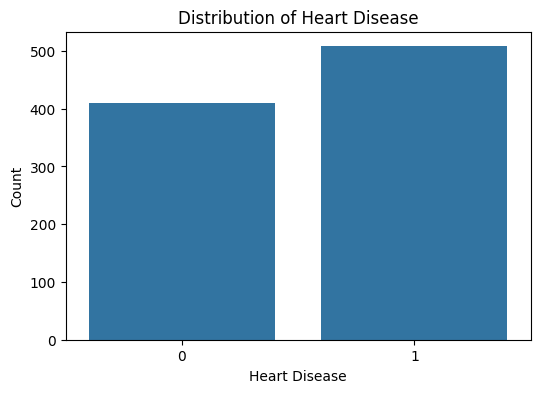

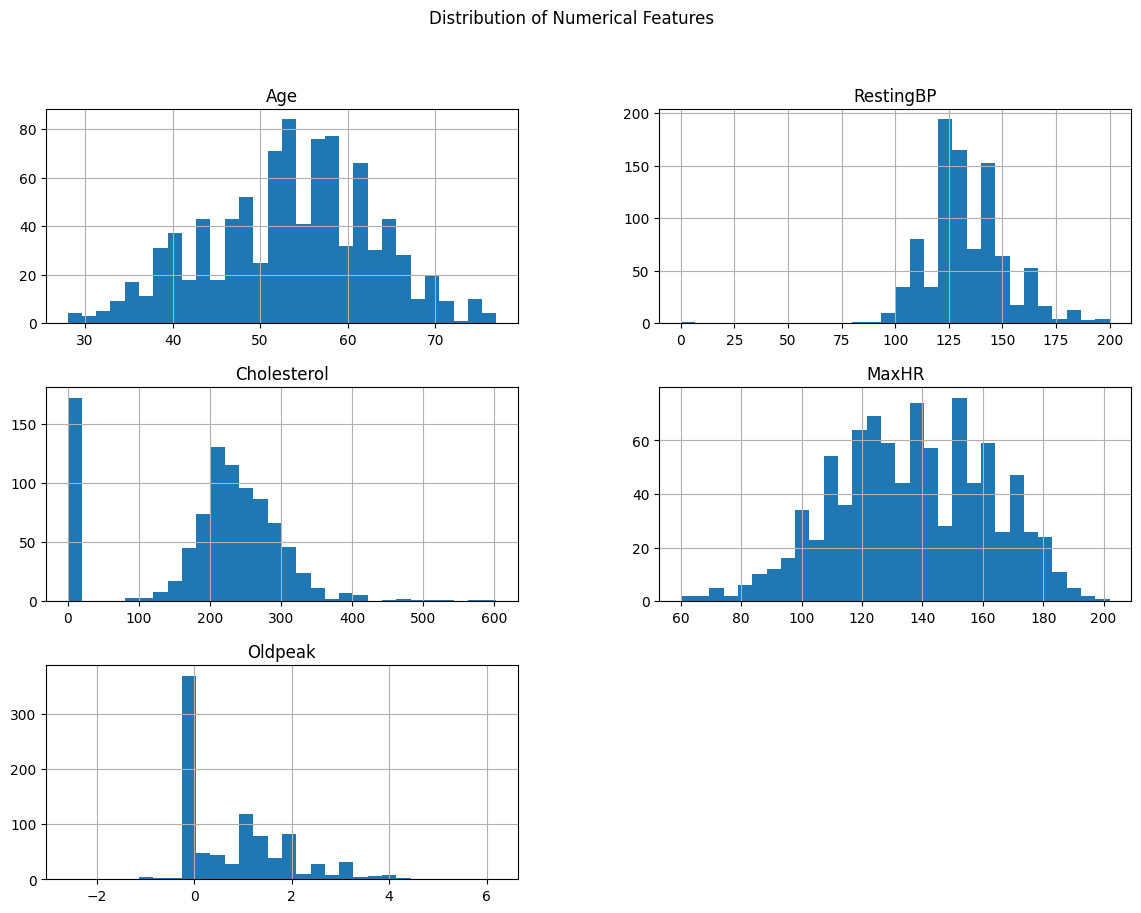

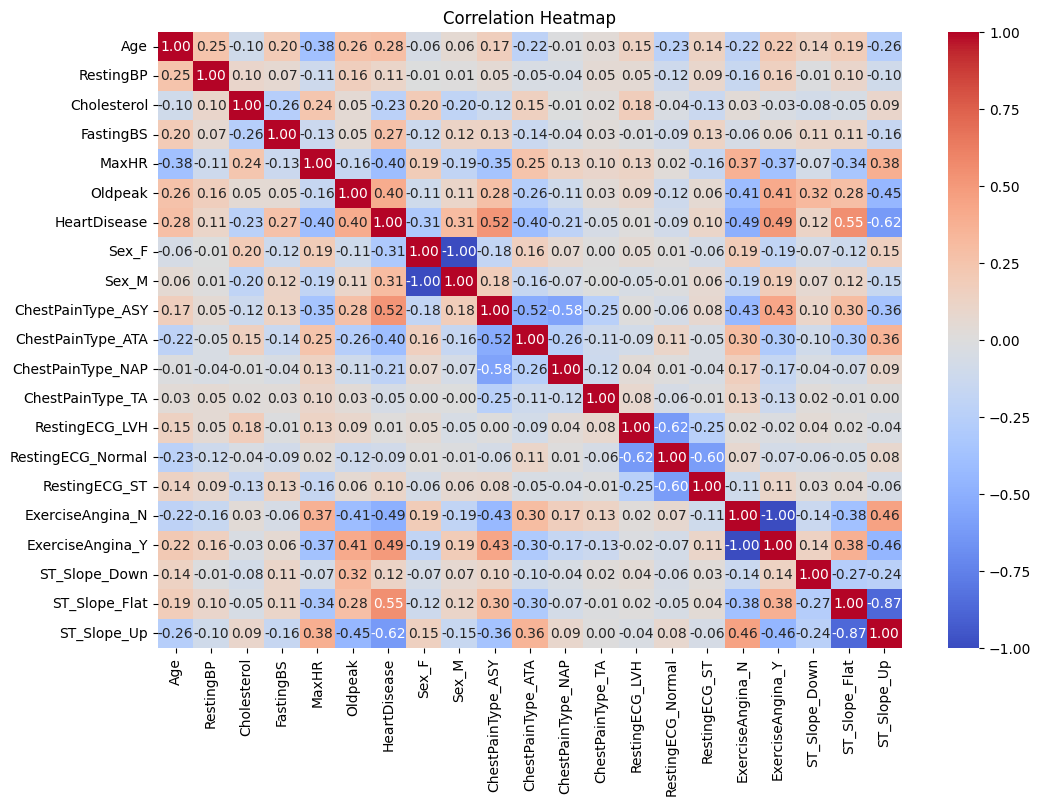


Accuracy: 85.33%


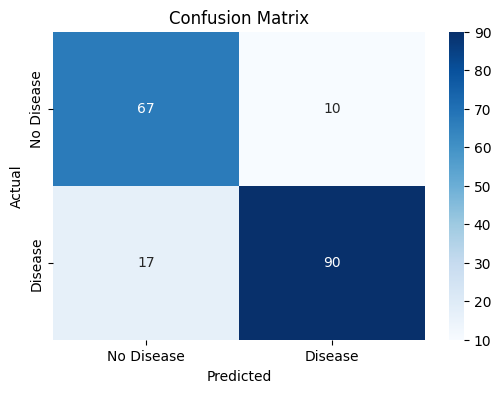


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184


Feature Coefficients:
                   Coefficient
Age                   0.139350
RestingBP             0.032506
Cholesterol          -0.523665
FastingBS             0.428754
MaxHR                -0.099732
Oldpeak               0.488320
Sex_F                -0.272549
Sex_M                 0.272549
ChestPainType_ASY     0.435623
ChestPainType_ATA    -0.238911
ChestPainType_NAP    -0.269636
ChestPainType_TA     -0.056043
RestingECG_LVH        0.089633
RestingECG_Normal     0.003760
RestingECG_ST        -0.096183
ExerciseAngina_N     -0.269377
ExerciseAngina_Y      0.269377
ST_Slope_Down        -0.028598
ST_Slope_Flat         0.604939
ST_Slo

<Figure size 1200x800 with 0 Axes>

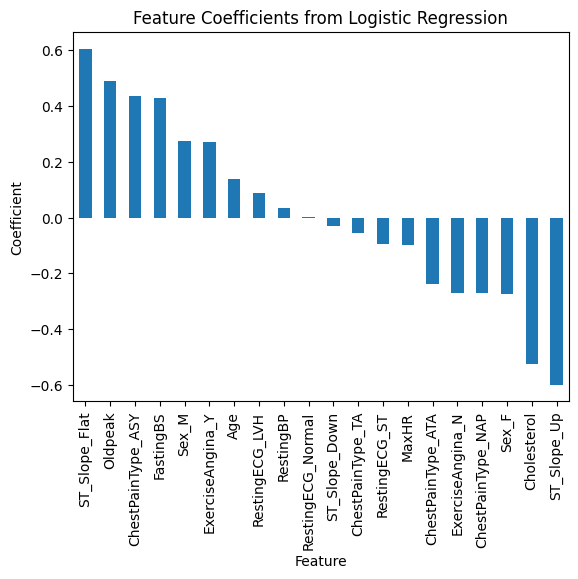

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load the Dataset
from google.colab import files
uploaded = files.upload()

# Read the uploaded CSV file into a DataFrame
df = pd.read_csv(list(uploaded.keys())[0])  # This reads the file you just uploaded

# Display the first few rows and columns of the dataset
print(df.head())
print(df.columns)

# Step 3: Exploratory Data Analysis (EDA)
# Checking for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Statistical summary of the dataset
print("\nStatistical Summary:")
print(df.describe())

# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

# Histograms of numerical features
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df[numerical_features].hist(figsize=(14, 10), bins=30)
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Split the dataset into features (X) and target (y)
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Logistic Regression Model
# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Step 6: Model Evaluation
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display feature coefficients
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
print("\nFeature Coefficients:")
print(coefficients)

# Plot feature coefficients
plt.figure(figsize=(12, 8))
coefficients.sort_values(by='Coefficient', ascending=False).plot(kind='bar', legend=False)
plt.title('Feature Coefficients from Logistic Regression')
plt.ylabel('Coefficient')
plt.xlabel('Feature')
plt.show()


Saving UCI_Credit_Card.csv to UCI_Credit_Card (1).csv
First few rows of the dataset:
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

 

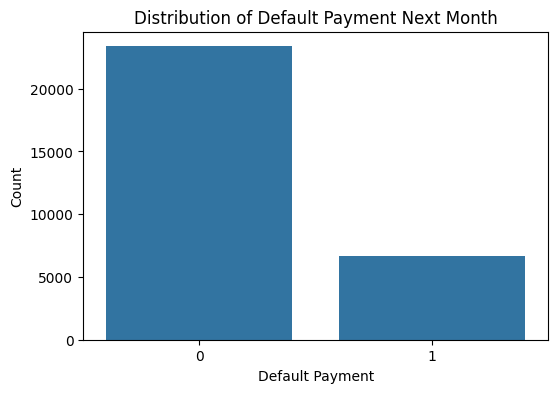

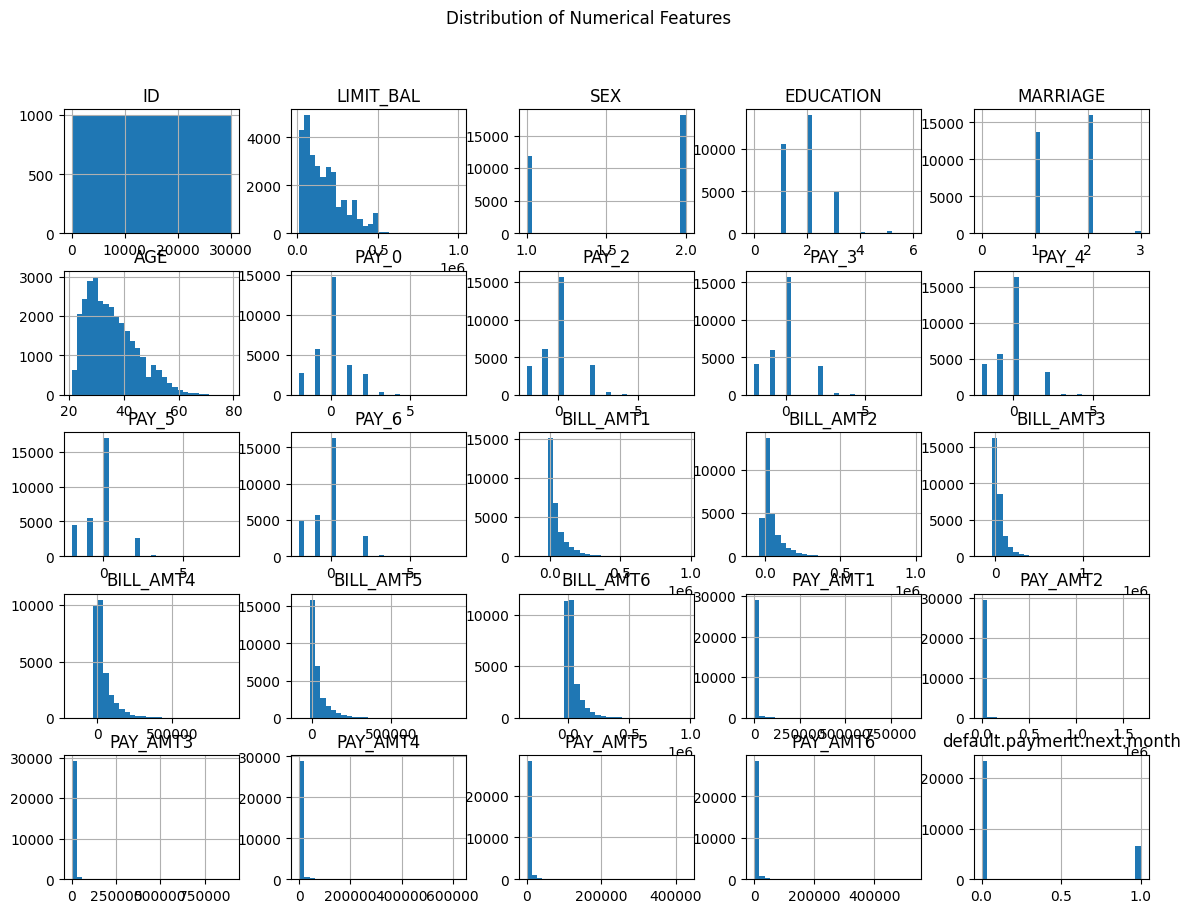

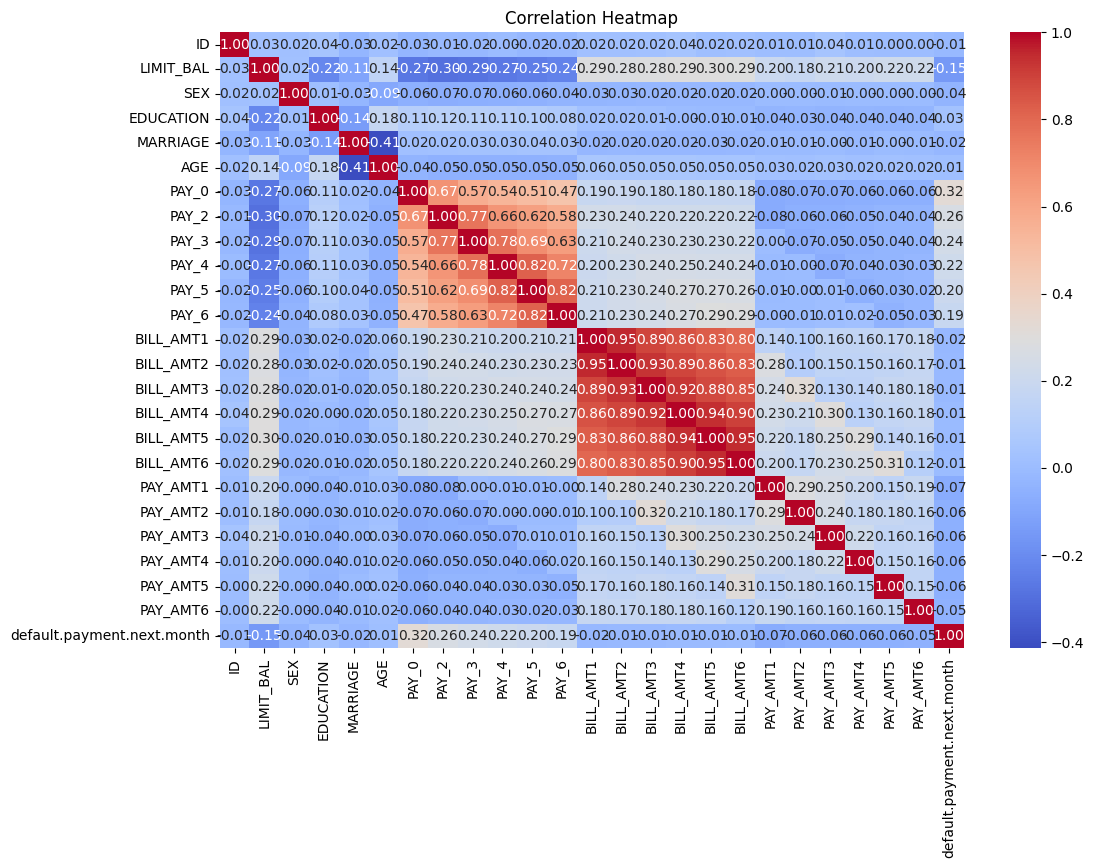


Accuracy: 81.00%


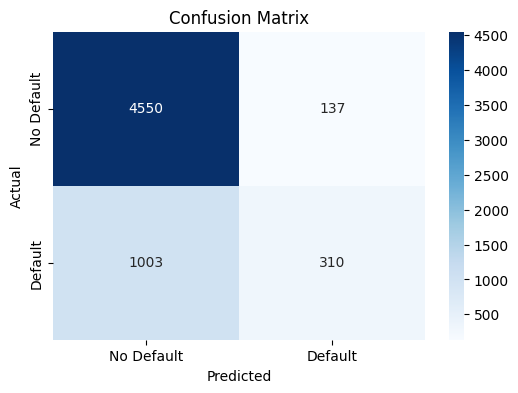


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000


Feature Coefficients:
           Coefficient
ID           -0.003959
LIMIT_BAL    -0.106475
SEX          -0.056077
EDUCATION    -0.077489
MARRIAGE     -0.079240
AGE           0.076880
PAY_0         0.648860
PAY_2         0.108719
PAY_3         0.077410
PAY_4         0.053174
PAY_5         0.020428
PAY_6         0.016452
BILL_AMT1    -0.369450
BILL_AMT2     0.140297
BILL_AMT3     0.105671
BILL_AMT4    -0.054964
BILL_AMT5     0.040544
BILL_AMT6     0.021901
PAY_AMT1     -0.175379
PAY_AMT2     -0.246666
PAY_AMT3     -0.025156
PAY_AMT4     -0.055919
PAY_AMT5     -0.021756
PAY_AMT6     -0.048184


<Figure size 1200x800 with 0 Axes>

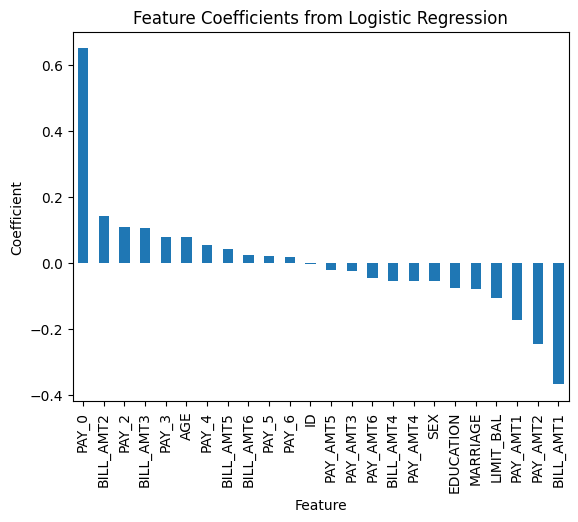

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import files

# Step 1: Upload and Load the Dataset
uploaded = files.upload()

# Load the dataset into a DataFrame
df = pd.read_csv(list(uploaded.keys())[0])

# Display the first few rows and columns of the dataset
print("First few rows of the dataset:")
print(df.head())
print("\nColumns in the dataset:")
print(df.columns)

# Step 2: Exploratory Data Analysis (EDA)
# Checking for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Statistical summary of the dataset
print("\nStatistical Summary:")
print(df.describe())

# Set the correct target column name
target_column = 'default.payment.next.month'

# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=target_column, data=df)
plt.title('Distribution of Default Payment Next Month')
plt.xlabel('Default Payment')
plt.ylabel('Count')
plt.show()

# Histograms of numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns
df[numerical_features].hist(figsize=(14, 10), bins=30)
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Correlation heatmap (exclude non-numeric columns for correlation)
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Step 3: Preprocessing
# Convert categorical columns to numeric if necessary
df_encoded = pd.get_dummies(df, drop_first=True)  # Convert categorical variables to dummy variables

# Split the dataset into features (X) and target (y)
X = df_encoded.drop(target_column, axis=1)
y = df_encoded[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Build and Evaluate Model
# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display feature coefficients
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
print("\nFeature Coefficients:")
print(coefficients)

# Plot feature coefficients
plt.figure(figsize=(12, 8))
coefficients.sort_values(by='Coefficient', ascending=False).plot(kind='bar', legend=False)
plt.title('Feature Coefficients from Logistic Regression')
plt.ylabel('Coefficient')
plt.xlabel('Feature')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from google.colab import files

# Step 1: Upload and Load the Dataset
uploaded = files.upload()

# Load the dataset into a DataFrame
df = pd.read_csv(list(uploaded.keys())[0])

# Display the first few rows and columns of the dataset
print("First few rows of the dataset:")
print(df.head())
print("\nColumns in the dataset:")
print(df.columns)

# Step 2: Exploratory Data Analysis (EDA)
# Checking for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Statistical summary of the dataset
print("\nStatistical Summary:")
print(df.describe())

# Set the correct target column name
target_column = 'default.payment.next.month'

# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=target_column, data=df)
plt.title('Distribution of Default Payment Next Month')
plt.xlabel('Default Payment')
plt.ylabel('Count')
plt.show()

# Histograms of numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns
df[numerical_features].hist(figsize=(14, 10), bins=30)
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Correlation heatmap (exclude non-numeric columns for correlation)
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Pairwise relationships
sns.pairplot(numeric_df, hue=target_column)
plt.title('Pairwise Relationships')
plt.show()

# Boxplots for numerical features with respect to the target variable
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=target_column, y=feature, data=df)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# Count plots for categorical features (excluding target variable)
categorical_features = df.select_dtypes(include=[object]).columns
categorical_features = categorical_features[categorical_features != target_column]
plt.figure(figsize=(14, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(4, 4, i + 1)
    sns.countplot(x=feature, data=df)
    plt.title(f'Count Plot of {feature}')
plt.tight_layout()
plt.show()

# Step 3: Preprocessing
# Convert categorical columns to numeric if necessary
df_encoded = pd.get_dummies(df, drop_first=True)  # Convert categorical variables to dummy variables

# Split the dataset into features (X) and target (y)
X = df_encoded.drop(target_column, axis=1)
y = df_encoded[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Build and Evaluate Model
# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC Curve

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display feature coefficients
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
print("\nFeature Coefficients:")
print(coefficients)

# Plot feature coefficients
plt.figure(figsize=(12, 8))
coefficients.sort_values(by='Coefficient', ascending=False).plot(kind='bar', legend=False)
plt.title('Feature Coefficients from Logistic Regression')
plt.ylabel('Coefficient')
plt.xlabel('Feature')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

uploaded = files.upload()

# Ensure the correct file name is used (this will match the uploaded file name)
file_path = list(uploaded.keys())[0]

# Step 2: Load the dataset
data = pd.read_csv(file_path)

# Step 3: Display basic information about the dataset
print("Dataset Information:")
print(data.info())
print("First 5 rows of the dataset:")
print(data.head())
# Step 3: Check for missing values
print("Checking for missing values:")
print(data.isnull().sum())

# Step 4: Preprocess the data
# Assuming 'Diabetes_binary' is the target column (adjust as necessary)
X = data.drop(columns=['Diabetes_binary'])  # Replace with the actual target column if different
y = data['Diabetes_binary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'Training size: {X_train.shape}, Test size: {X_test.shape}')

# Step 5: Implement C4.5 (Decision Tree with Entropy)
clf_c45 = DecisionTreeClassifier(criterion="entropy")
clf_c45.fit(X_train, y_train)
y_pred_c45 = clf_c45.predict(X_test)
accuracy_c45 = metrics.accuracy_score(y_test, y_pred_c45)
print(f'C4.5 (Entropy) Accuracy: {accuracy_c45 * 100:.2f}%')

# Step 6: Implement CART (Decision Tree with Gini)
clf_cart = DecisionTreeClassifier(criterion="gini")
clf_cart.fit(X_train, y_train)
y_pred_cart = clf_cart.predict(X_test)
accuracy_cart = metrics.accuracy_score(y_test, y_pred_cart)
print(f'CART (Gini) Accuracy: {accuracy_cart * 100:.2f}%')

# Step 7: Compare the results
print("\nModel Comparison:")
print(f'C4.5 Accuracy: {accuracy_c45 * 100:.2f}%')
print(f'CART Accuracy: {accuracy_cart * 100:.2f}%')


Saving diabetes_binary_5050split_health_indicators_BRFSS2015.csv to diabetes_binary_5050split_health_indicators_BRFSS2015 (2).csv
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare        